<a href="https://www.kaggle.com/code/srinivassateesh/all-regressions?scriptVersionId=92268746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Using only numpy**

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.22687448],
       [2.89099997]])

In [3]:
X_new= np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.22687448],
       [10.00887443]])

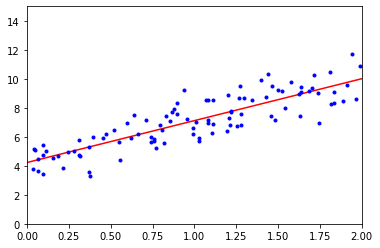

In [4]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# **Sklearn.Linear_Regression**

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.22687448]), array([[2.89099997]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.22687448],
       [10.00887443]])

# **Gradient Descent**

In [7]:
eta = .1 #learning rate
n_iterations = 1000
m=100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients
theta

array([[4.22687448],
       [2.89099997]])

# **Stochastic Gradient Descent**

In [8]:
n_epochs = 50
t0,t1 = 5,50  #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi= X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients =  2 *xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients


In [9]:
theta

array([[4.25856331],
       [2.88984885]])

# **SGD using scikit learn**

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [11]:
 sgd_reg.intercept_, sgd_reg.coef_

(array([4.19272112]), array([2.87650267]))

# **Polynomial Regression**

In [12]:
m=100
X=6*np.random.randn(m,1)-3
y = 0.5 * X**2 + X + 2  + np.random.randn(m,1)
                                       

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X_poly[0]

array([0.46908956, 0.22004501])

In [14]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.98006145]), array([[1.03247289, 0.50291972]]))

# **Regularized Linear Models**
*Ridge,Lasso and ElasticNet*

In [15]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=.1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[11.16553993]])

In [16]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([12.05275012])

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([11.18067686])

In [18]:
sgd_reg_lasso= SGDRegressor(penalty="l1")
sgd_reg_lasso.fit(X,y.ravel())
sgd_reg_lasso.predict([[1.5]])

array([10.88268863])

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.9)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([11.18163556])